**CAUSE OF DEATH ANALYSIS**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files

# Upload file dari komputer lokal
uploaded = files.upload()

Saving causeofdeath.csv to causeofdeath.csv


In [9]:
df = pd.read_csv('/content/causeofdeath.csv')

In [13]:
# Dataset - Cause Of Death
df.head()

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,Bencana Alam,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,Bencana Non Alam dan Penyakit,2003,5,261,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...


In [7]:
# Information about Dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cause            1062 non-null   object
 1   Type             1062 non-null   object
 2   Year             1062 non-null   int64 
 3   Data Redundancy  1062 non-null   int64 
 4   Total Deaths     1062 non-null   int64 
 5   Source           1062 non-null   object
 6   Page at Source   1060 non-null   object
 7   Source URL       1060 non-null   object
dtypes: int64(3), object(5)
memory usage: 66.5+ KB


In [8]:
# Statistical Information of Dataframe

df.describe()

,Year,Data Redundancy,Total Deaths
count,1062.000000,1062.000000,1062.000000
mean,2010.202448,2.932203,1194.364407
std,5.227120,2.776486,6248.983680
min,2000.000000,1.000000,0.000000
25%,2006.000000,1.000000,6.000000
50%,2009.000000,1.000000,42.000000
75%,2014.000000,4.000000,261.000000
max,2022.000000,12.000000,129171.000000


In [9]:
# Total no.of records in the Dataframe

len(df)

1062

In [10]:
# Shape of the Dataframe

df.shape

(1062, 8)

In [11]:
# Checking for null values in the Datafrme

df.isna().sum()


Cause              0
Type               0
Year               0
Data Redundancy    0
Total Deaths       0
Source             0
Page at Source     2
Source URL         2
dtype: int64

In [12]:
# Menghapus kolom yang mengandung nilai yang hilang
df.dropna(axis=1, inplace=True)

In [18]:
# Checking for null values in the Datafrme

df.isna().sum()

# No null entries for any column in the Dataframe

Cause              0
Type               0
Year               0
Data Redundancy    0
Total Deaths       0
Source             0
Page at Source     0
Source URL         0
total_death        0
dtype: int64

In [14]:
# The no.of Year data in the Dataframe

df['Year'].nunique()

23

In [15]:
# The unique Year data in the Dataframe

df['Year'].unique()

array([2012, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2019, 2020, 2021, 2015, 2016, 2017, 2018, 2013, 2014,
       2022])

In [16]:
# Correlation of various causes of death against year

df.corr()['Year']

<ipython-input-16-3fe7d6cb65e4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Year']


Year               1.000000
Data Redundancy   -0.107507
Total Deaths      -0.050483
Name: Year, dtype: float64

In [17]:
# Menghapus baris yang duplikat
df.drop_duplicates(inplace=True)

In [19]:
# Columns in the Dataframe

df.columns

Index(['Cause', 'Type', 'Year', 'Data Redundancy', 'Total Deaths', 'Source'], dtype='object')

In [19]:
relevant_columns = ['Cause', 'Type', 'Year', 'Total Deaths']
df = df[relevant_columns]

In [22]:
# Total no.of Cause in the DataFrame

df['Cause'].nunique()

181

In [29]:
# Total no.of year data provided for Cause in the DataFrame

df['Cause'].value_counts()

Avian Influenza (Flu Burung)                101
Leptospirosis                                75
Antraks                                      74
KLB Diare                                    64
Rabies - Lyssa                               54
                                           ... 
Longsor Sampah                                1
Letusan/Peningkatan Aktivitas Gunung Api      1
Letusan Gunung Berapi                         1
KLB Gizi Buruk                                1
Abrasi Air Laut                               1
Name: Cause, Length: 181, dtype: int64

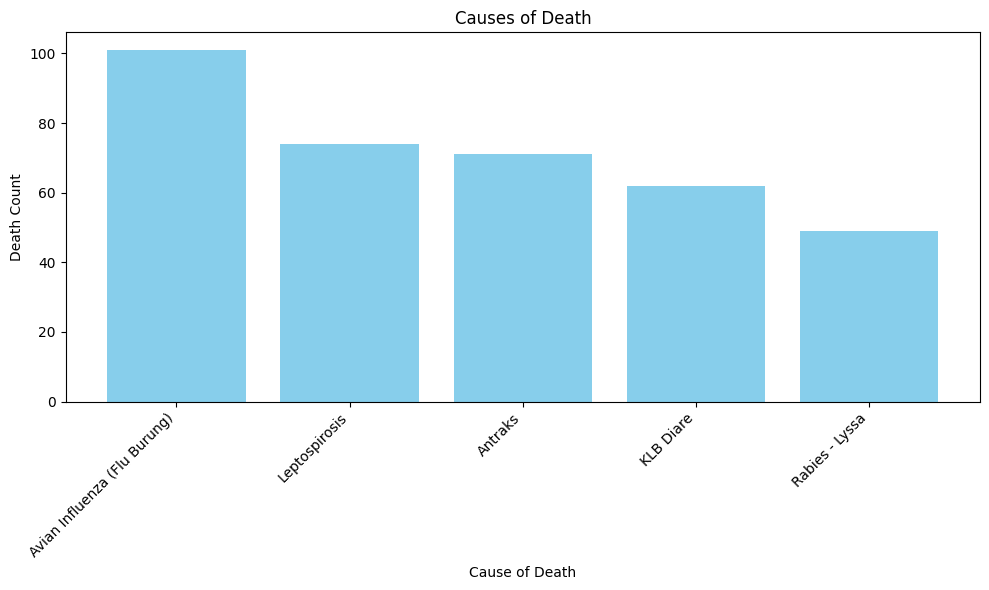

In [30]:
# Create a dictionary with causes of death and their death counts
causes_of_death = {
    'Avian Influenza (Flu Burung)': 101,
    'Leptospirosis': 74,
    'Antraks': 71,
    'KLB Diare': 62,
    'Rabies - Lyssa': 49,
    # Add more causes of death and their counts here
}

# Convert the dictionary to a DataFrame
df_causes = pd.DataFrame.from_dict(causes_of_death, orient='index', columns=['Death Count'])

# Sort the DataFrame by death count in descending order
df_causes_sorted = df_causes.sort_values(by='Death Count', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_causes_sorted.index, df_causes_sorted['Death Count'], color='skyblue')
plt.xlabel('Cause of Death')
plt.ylabel('Death Count')
plt.title('Causes of Death')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
# Menghapus baris yang mengandung data kosong
df.dropna(axis=0, inplace=True)

In [22]:
# Menghapus baris dengan nilai kosong pada kolom 'Cause'
df_cleaned = df.dropna(subset=['Cause', 'Type', 'Year', 'Total Deaths'])

# Menampilkan informasi tentang DataFrame setelah menghapus nilai kosong
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1060 entries, 0 to 1061
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Cause         1060 non-null   object
 1   Type          1060 non-null   object
 2   Year          1060 non-null   int64 
 3   Total Deaths  1060 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 41.4+ KB
None


EXPLORATION DATA

TOP 10 CAUSE OF DEATH

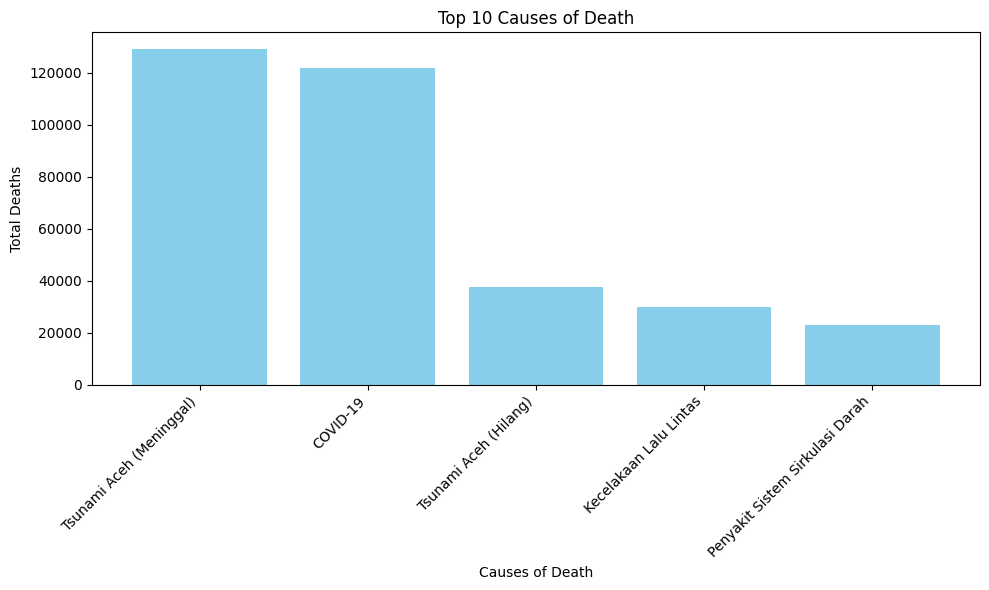

In [26]:
# Retrieve the top 10 causes of death
top_10_causes = df.nlargest(10, 'Total Deaths')

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_causes['Cause'], top_10_causes['Total Deaths'], color='skyblue')
plt.xlabel('Causes of Death')
plt.ylabel('Total Deaths')
plt.title('Top 10 Causes of Death')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust plot layout to avoid overlapping
plt.show()

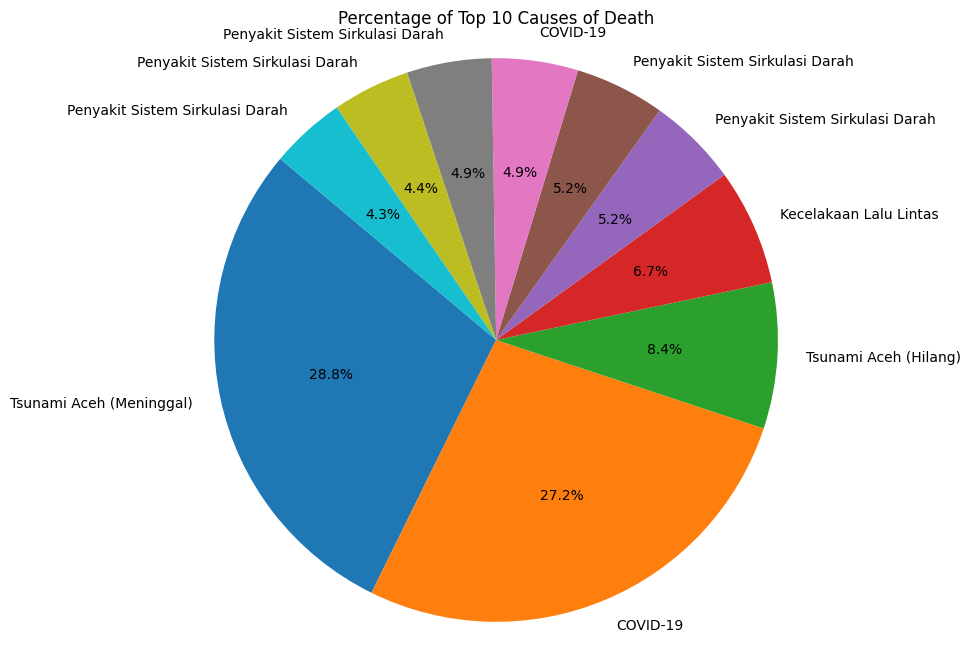

In [27]:
# Calculate the percentage of each cause
total_deaths = top_10_causes['Total Deaths'].sum()
top_10_causes['Percentage'] = (top_10_causes['Total Deaths'] / total_deaths) * 100

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_causes['Percentage'], labels=top_10_causes['Cause'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Top 10 Causes of Death')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [ ]:
# Filtering data untuk kasus flu burung
avian_influenza_data = df[df['Cause'] == 'Avian Influenza']

# Menghitung jumlah kasus flu burung untuk setiap tahun
cases_per_year = avian_influenza_data.groupby('Year')['Total Deaths'].sum()

# Menemukan tahun dengan jumlah kasus flu burung terbanyak
year_with_most_cases = cases_per_year.idxmax()
most_cases_count = cases_per_year.max()

print("Tahun dengan kasus flu burung terbanyak:", year_with_most_cases)
print("Jumlah kasus pada tahun tersebut:", most_cases_count)

The year with the most COVID-19 deaths

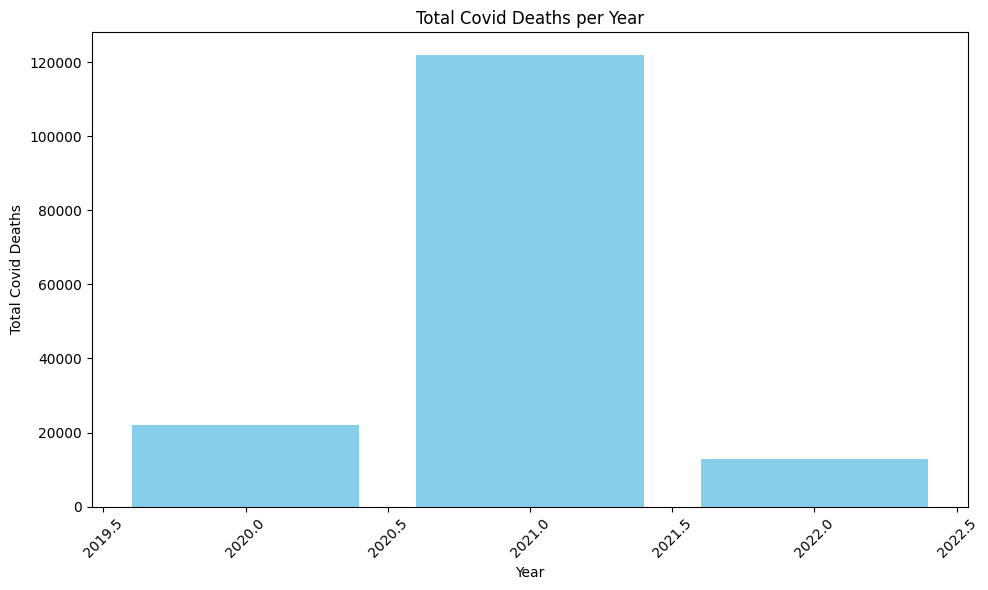

In [13]:
# Filter the data for Covid cases
covid_data = df[df['Cause'] == 'COVID-19']

# Group the data by year and calculate the total Covid deaths for each year
total_deaths_per_year_covid = covid_data.groupby('Year')['Total Deaths'].sum()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(total_deaths_per_year_covid.index, total_deaths_per_year_covid.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Covid Deaths')
plt.title('Total Covid Deaths per Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

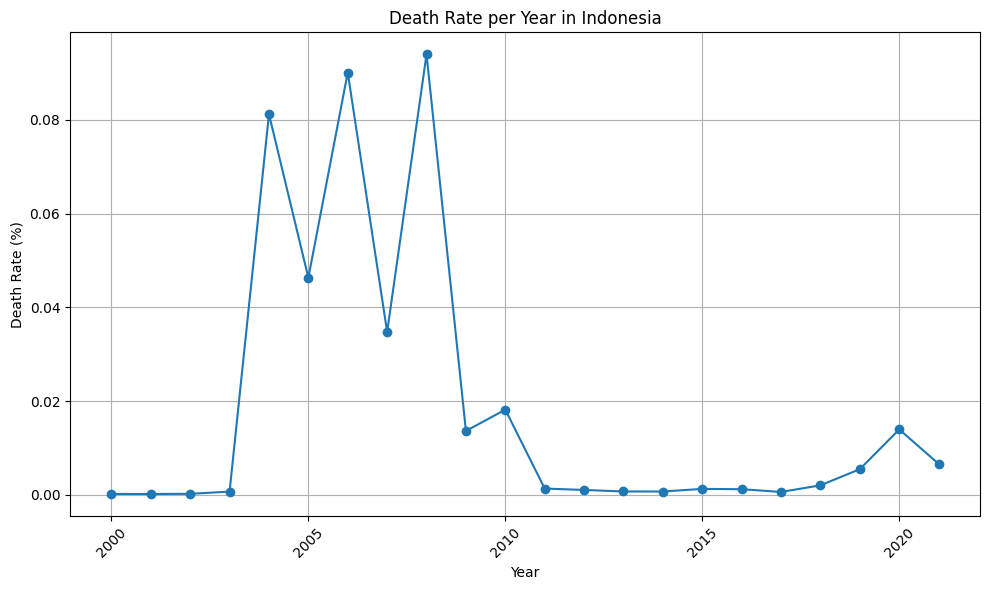

In [25]:
import matplotlib.pyplot as plt

# Population of Indonesia
indonesia_population = 273800000

# Calculate total deaths for each year
total_deaths_per_year = df.groupby('Year')['Total Deaths'].sum()

# Calculate death rate as percentage of population for each year
death_rate_per_year = (total_deaths_per_year / indonesia_population) * 100

# Plot year vs death rate as percentage
plt.figure(figsize=(10, 6))
plt.plot(death_rate_per_year.index, death_rate_per_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Death Rate (%)')
plt.title('Death Rate per Year in Indonesia')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Year with Most Deaths

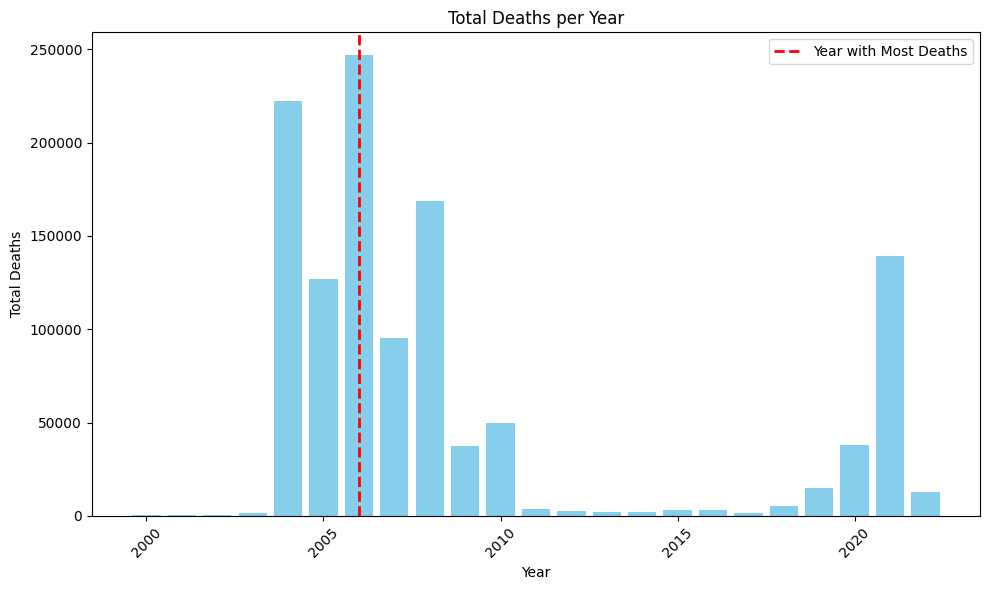

In [29]:
# Calculate the total deaths for each year
total_deaths_per_year = df.groupby('Year')['Total Deaths'].sum()

# Find the year with the highest number of deaths
year_with_most_deaths = total_deaths_per_year.idxmax()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(total_deaths_per_year.index, total_deaths_per_year.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.title('Total Deaths per Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.axvline(x=year_with_most_deaths, color='red', linestyle='--', linewidth=2, label='Year with Most Deaths')
plt.legend()
plt.tight_layout()
plt.show()

Year with Least Deaths

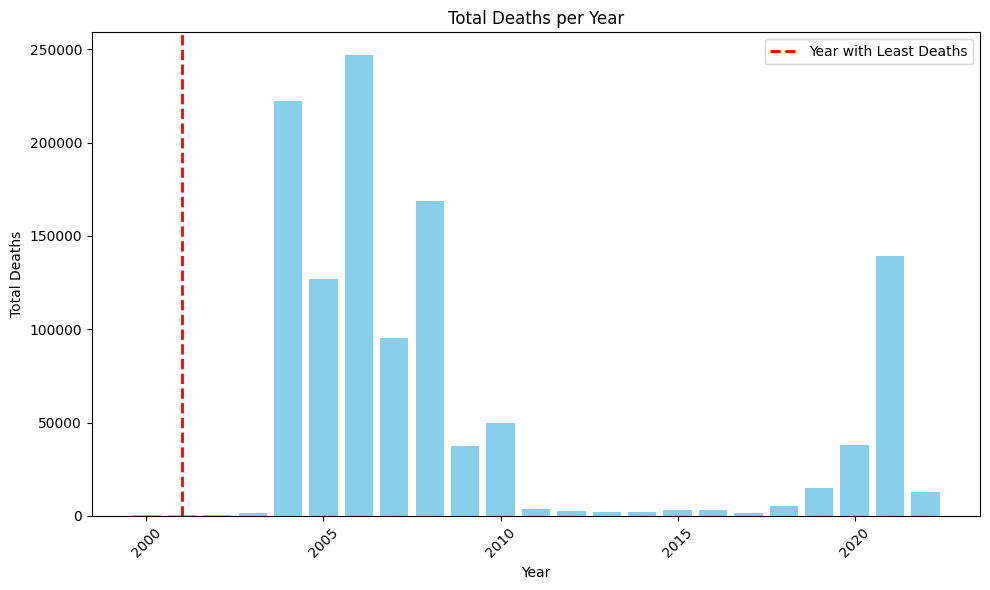

In [30]:
# Calculate the total deaths for each year
total_deaths_per_year = df.groupby('Year')['Total Deaths'].sum()

# Find the year with the lowest number of deaths
year_with_least_deaths = total_deaths_per_year.idxmin()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(total_deaths_per_year.index, total_deaths_per_year.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.title('Total Deaths per Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.axvline(x=year_with_least_deaths, color='red', linestyle='--', linewidth=2, label='Year with Least Deaths')
plt.legend()
plt.tight_layout()
plt.show()

Deadliest Year

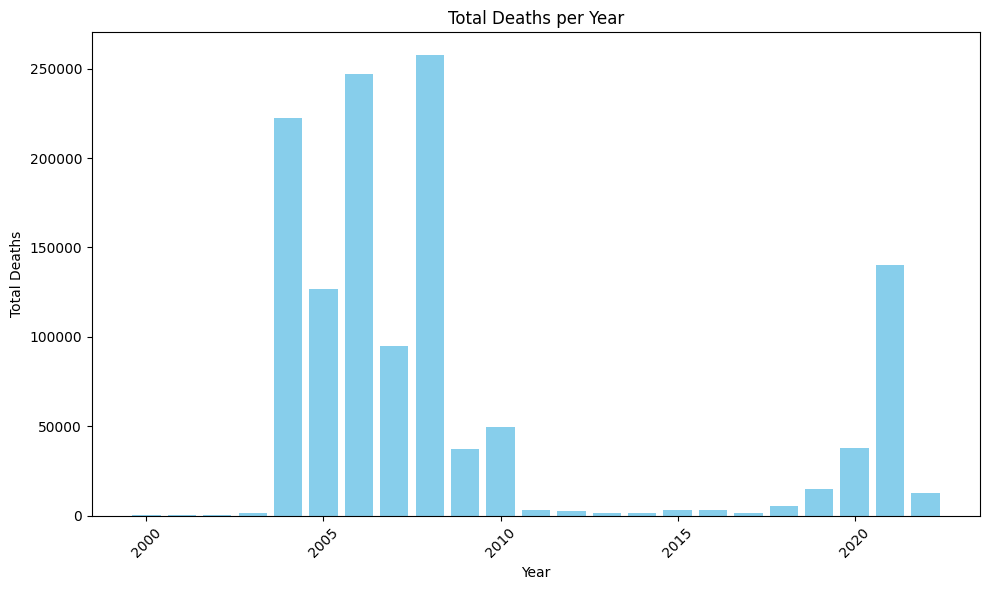

In [7]:

# Calculate the total deaths for each year
total_deaths_per_year = df.groupby('Year')['Total Deaths'].sum()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(total_deaths_per_year.index, total_deaths_per_year.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.title('Total Deaths per Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Which Year suffers from what disease the most?

In [15]:
# Group the data by year and cause, and calculate the total deaths for each combination
total_deaths_per_year_cause = df.groupby(['Year', 'Cause'])['Total Deaths'].sum()

# Find the disease with the highest number of deaths for each year
most_common_disease_per_year = total_deaths_per_year_cause.groupby('Year').idxmax().apply(lambda x: x[1])

print(most_common_disease_per_year)

Year
2000                          KLB Diare
2001                          KLB Diare
2002                          KLB Diare
2003                               AIDS
2004           Tsunami Aceh (Meninggal)
2005    Penyakit Sistem Sirkulasi Darah
2006    Penyakit Sistem Sirkulasi Darah
2007    Penyakit Sistem Sirkulasi Darah
2008    Penyakit Sistem Sirkulasi Darah
2009             Kecelakaan Lalu Lintas
2010             Kecelakaan Lalu Lintas
2011                     Rabies - Lyssa
2012                     Rabies - Lyssa
2013        Demam Berdarah Dengue (DBD)
2014        Demam Berdarah Dengue (DBD)
2015        Demam Berdarah Dengue (DBD)
2016        Demam Berdarah Dengue (DBD)
2017        Demam Berdarah Dengue (DBD)
2018             Gempa Bumi dan Tsunami
2019                       Tuberkulosis
2020                           COVID-19
2021                           COVID-19
2022                           COVID-19
Name: Total Deaths, dtype: object


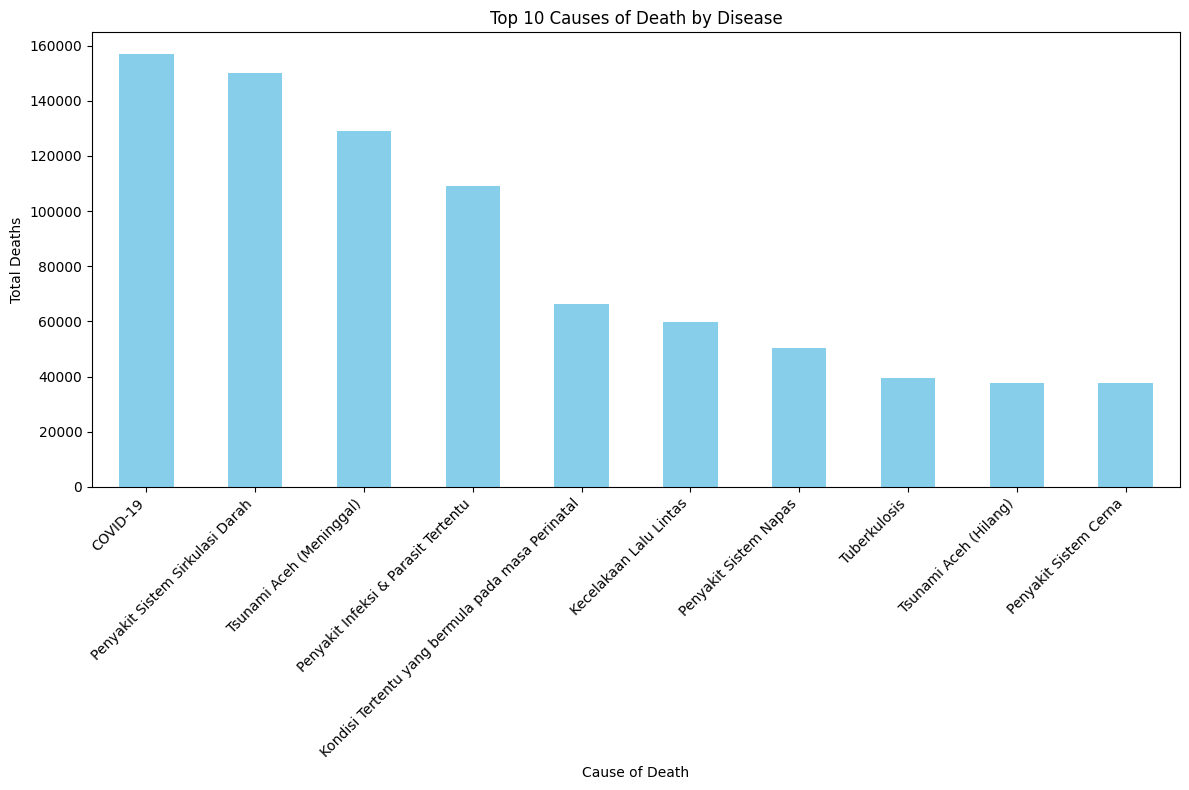

In [18]:

# Group the data by cause of death and calculate the total deaths for each cause
total_deaths_per_cause = df.groupby('Cause')['Total Deaths'].sum()

# Sort the total deaths in descending order and select the top 10 causes of death
top_10_causes_of_death = total_deaths_per_cause.sort_values(ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 8))
top_10_causes_of_death.plot(kind='bar', color='skyblue')
plt.xlabel('Cause of Death')
plt.ylabel('Total Deaths')
plt.title('Top 10 Causes of Death by Disease')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()